In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_csv('american_bankruptcy.csv')
df.rename(columns={'X1':'Current assets','X2':'Cost of goods sold',
                   'X3':'Depreciation and amortization','X4':'EBITDA',
                   'X5':'Inventory','X6':'Net Income','X7':'Total Receivables',
                   'X8':'Market value','X9':'Net sales','X10':'Total assets',
                   'X11':'Total Long-term debt','X12':'EBIT','X13':'Gross Profit',
                   'X14':'Total Current Liabilities','X15':'Retained Earnings',
                   'X16':'Total Revenue','X17':'Total Liabilities','X18':'Total Operating Expenses'},inplace=True)
data.head()

,company_name,status_label,year,Current assets,Cost of goods sold,Depreciation and amortization,EBITDA,Inventory,Net Income,Total Receivables,...,Net sales,Total assets,Total Long-term debt,EBIT,Gross Profit,Total Current Liabilities,Retained Earnings,Total Revenue,Total Liabilities,Total Operating Expenses
0,C_1,alive,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,alive,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,alive,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,alive,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,alive,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467


In [24]:
#create dictionary with explained meanings of columns
dict = {}
dict['Current assets'] = 'Current assets - All the assets of a company that are expected to be sold or used as a result of standard.\
business operations over the next year'
dict['Cost of goods sold'] = 'Cost of goods sold - The total amount a company paid as a cost directly related to the sale of products'
dict['Depreciation and amortization'] = 'Depreciation and amortization - Depreciation refers to the loss of value of a tangible fixed asset over.\
time (such as property, machinery, buildings, and plant). Amortization refers to the loss of value of.\
intangible assets over time.'
dict['EBITDA'] = 'EBITDA - Earnings before interest, taxes, depreciation, and amortization. It is a measure of a company"s.\
overall financial performance, serving as an alternative to net income.'
dict['Inventory'] = 'Inventory - The accounting of items and raw materials that a company either uses in production or sells.'
dict['Net Income'] = 'Net Income - The overall profitability of a company after all expenses and costs have been deducted from.\
total revenue.'
dict['Total Receivables'] = 'Total Receivables - The balance of money due to a firm for goods or services delivered or used but not.\
yet paid for by customers.'
dict['Market value'] = 'Market value - The price of an asset in a marketplace. In this dataset, it refers to the market.\
capitalization since companies are publicly traded in the stock market.'
dict['Net sales'] = 'Net sales - The sum of a company"s gross sales minus its returns, allowances, and discounts.'
dict['Total assets'] = 'Total assets - All the assets, or items of value, a business owns.'
dict['Total Long-term debt'] = 'Total Long-term debt - A company"s loans and other liabilities that will not become due within one year.\
of the balance sheet date.'
dict['EBIT'] = 'EBIT - Earnings before interest and taxes.'
dict['Gross Profit'] = 'Gross Profit - The profit a business makes after subtracting all the costs that are related to.\
manufacturing and selling its products or services.'
dict['Total Current Liabilities'] = 'Total Current Liabilities - The sum of accounts payable, accrued liabilities, and taxes such as Bonds.\
payable at the end of the year, salaries, and commissions remaining.'
dict['Retained Earnings'] = 'Retained Earnings - The amount of profit a company has left over after paying all its direct costs,.\
indirect costs, income taxes, and its dividends to shareholders.'
dict[ 'Total Revenue'] = 'Total Revenue - The amount of income that a business has made from all sales before subtracting expenses..\
It may include interest and dividends from investments.'
dict['Total Liabilities'] = 'Total Liabilities - The combined debts and obligations that the company owes to outside parties.'
dict['Total Operating Expenses'] = 'Total Operating Expenses - The expenses a business incurs through its normal business operations.'

In [25]:
df.groupby('status_label', as_index=False).aggregate({'company_name':'count'})

,status_label,company_name
0,alive,73462
1,failed,5220


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78682 entries, 0 to 78681
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   company_name                   78682 non-null  object 
 1   status_label                   78682 non-null  object 
 2   year                           78682 non-null  int64  
 3   Current assets                 78682 non-null  float64
 4   Cost of goods sold             78682 non-null  float64
 5   Depreciation and amortization  78682 non-null  float64
 6   EBITDA                         78682 non-null  float64
 7   Inventory                      78682 non-null  float64
 8   Net Income                     78682 non-null  float64
 9   Total Receivables              78682 non-null  float64
 10  Market value                   78682 non-null  float64
 11  Net sales                      78682 non-null  float64
 12  Total assets                   78682 non-null 

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,78682.0,2007.506317,5.742768,1999.0000,2002.00000,2007.00000,2012.00000,2018.00
Current assets,78682.0,880.362485,3928.564794,-7.7600,18.92400,100.44950,431.52675,169662.00
Cost of goods sold,78682.0,1594.529029,8930.484664,-366.6450,17.03825,103.66100,634.54800,374623.00
Depreciation and amortization,78682.0,121.234256,652.376804,0.0000,1.19200,7.92950,47.97175,28430.00
EBITDA,78682.0,376.759424,2012.023142,-21913.0000,-0.81100,15.03450,139.65525,81730.00
Inventory,78682.0,201.605717,1060.766096,0.0000,0.00000,7.02300,74.74725,62567.00
Net Income,78682.0,129.382453,1265.532022,-98696.0000,-7.41575,1.61600,40.14425,104821.00
Total Receivables,78682.0,286.832743,1335.978571,-0.0060,3.28125,22.82000,131.58050,65812.00
Market value,78682.0,3414.354610,18414.103647,0.0001,34.98000,227.51185,1244.88995,1073390.54
Net sales,78682.0,2364.019706,11950.068842,-1964.9990,27.54850,186.59850,1046.40250,511729.00


In [28]:
df.describe(include='object')
#only include object like columns (non numerical)

,company_name,status_label
count,78682,78682
unique,8971,2
top,C_4081,alive
freq,20,73462


In [29]:
df_numeric=df.copy()
df_numeric.drop(columns=['company_name'],inplace=True)
df_numeric.head()
#dropped the company name

,status_label,year,Current assets,Cost of goods sold,Depreciation and amortization,EBITDA,Inventory,Net Income,Total Receivables,Market value,Net sales,Total assets,Total Long-term debt,EBIT,Gross Profit,Total Current Liabilities,Retained Earnings,Total Revenue,Total Liabilities,Total Operating Expenses
0,alive,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,372.7519,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,alive,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,377.1180,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,alive,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,364.5928,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,alive,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,143.3295,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,alive,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,308.9071,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467


In [30]:
#rewrite status as 1/0, if company alive we have one
df_numeric['status_label'] = pd.get_dummies(df_numeric, dtype=int)['status_label_alive']
df_numeric.head()

,status_label,year,Current assets,Cost of goods sold,Depreciation and amortization,EBITDA,Inventory,Net Income,Total Receivables,Market value,Net sales,Total assets,Total Long-term debt,EBIT,Gross Profit,Total Current Liabilities,Retained Earnings,Total Revenue,Total Liabilities,Total Operating Expenses
0,1,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,372.7519,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,1,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,377.1180,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,1,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,364.5928,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,1,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,143.3295,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,1,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,308.9071,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467


In [31]:
corr = df_numeric.corr()
#calculate correlation matrix

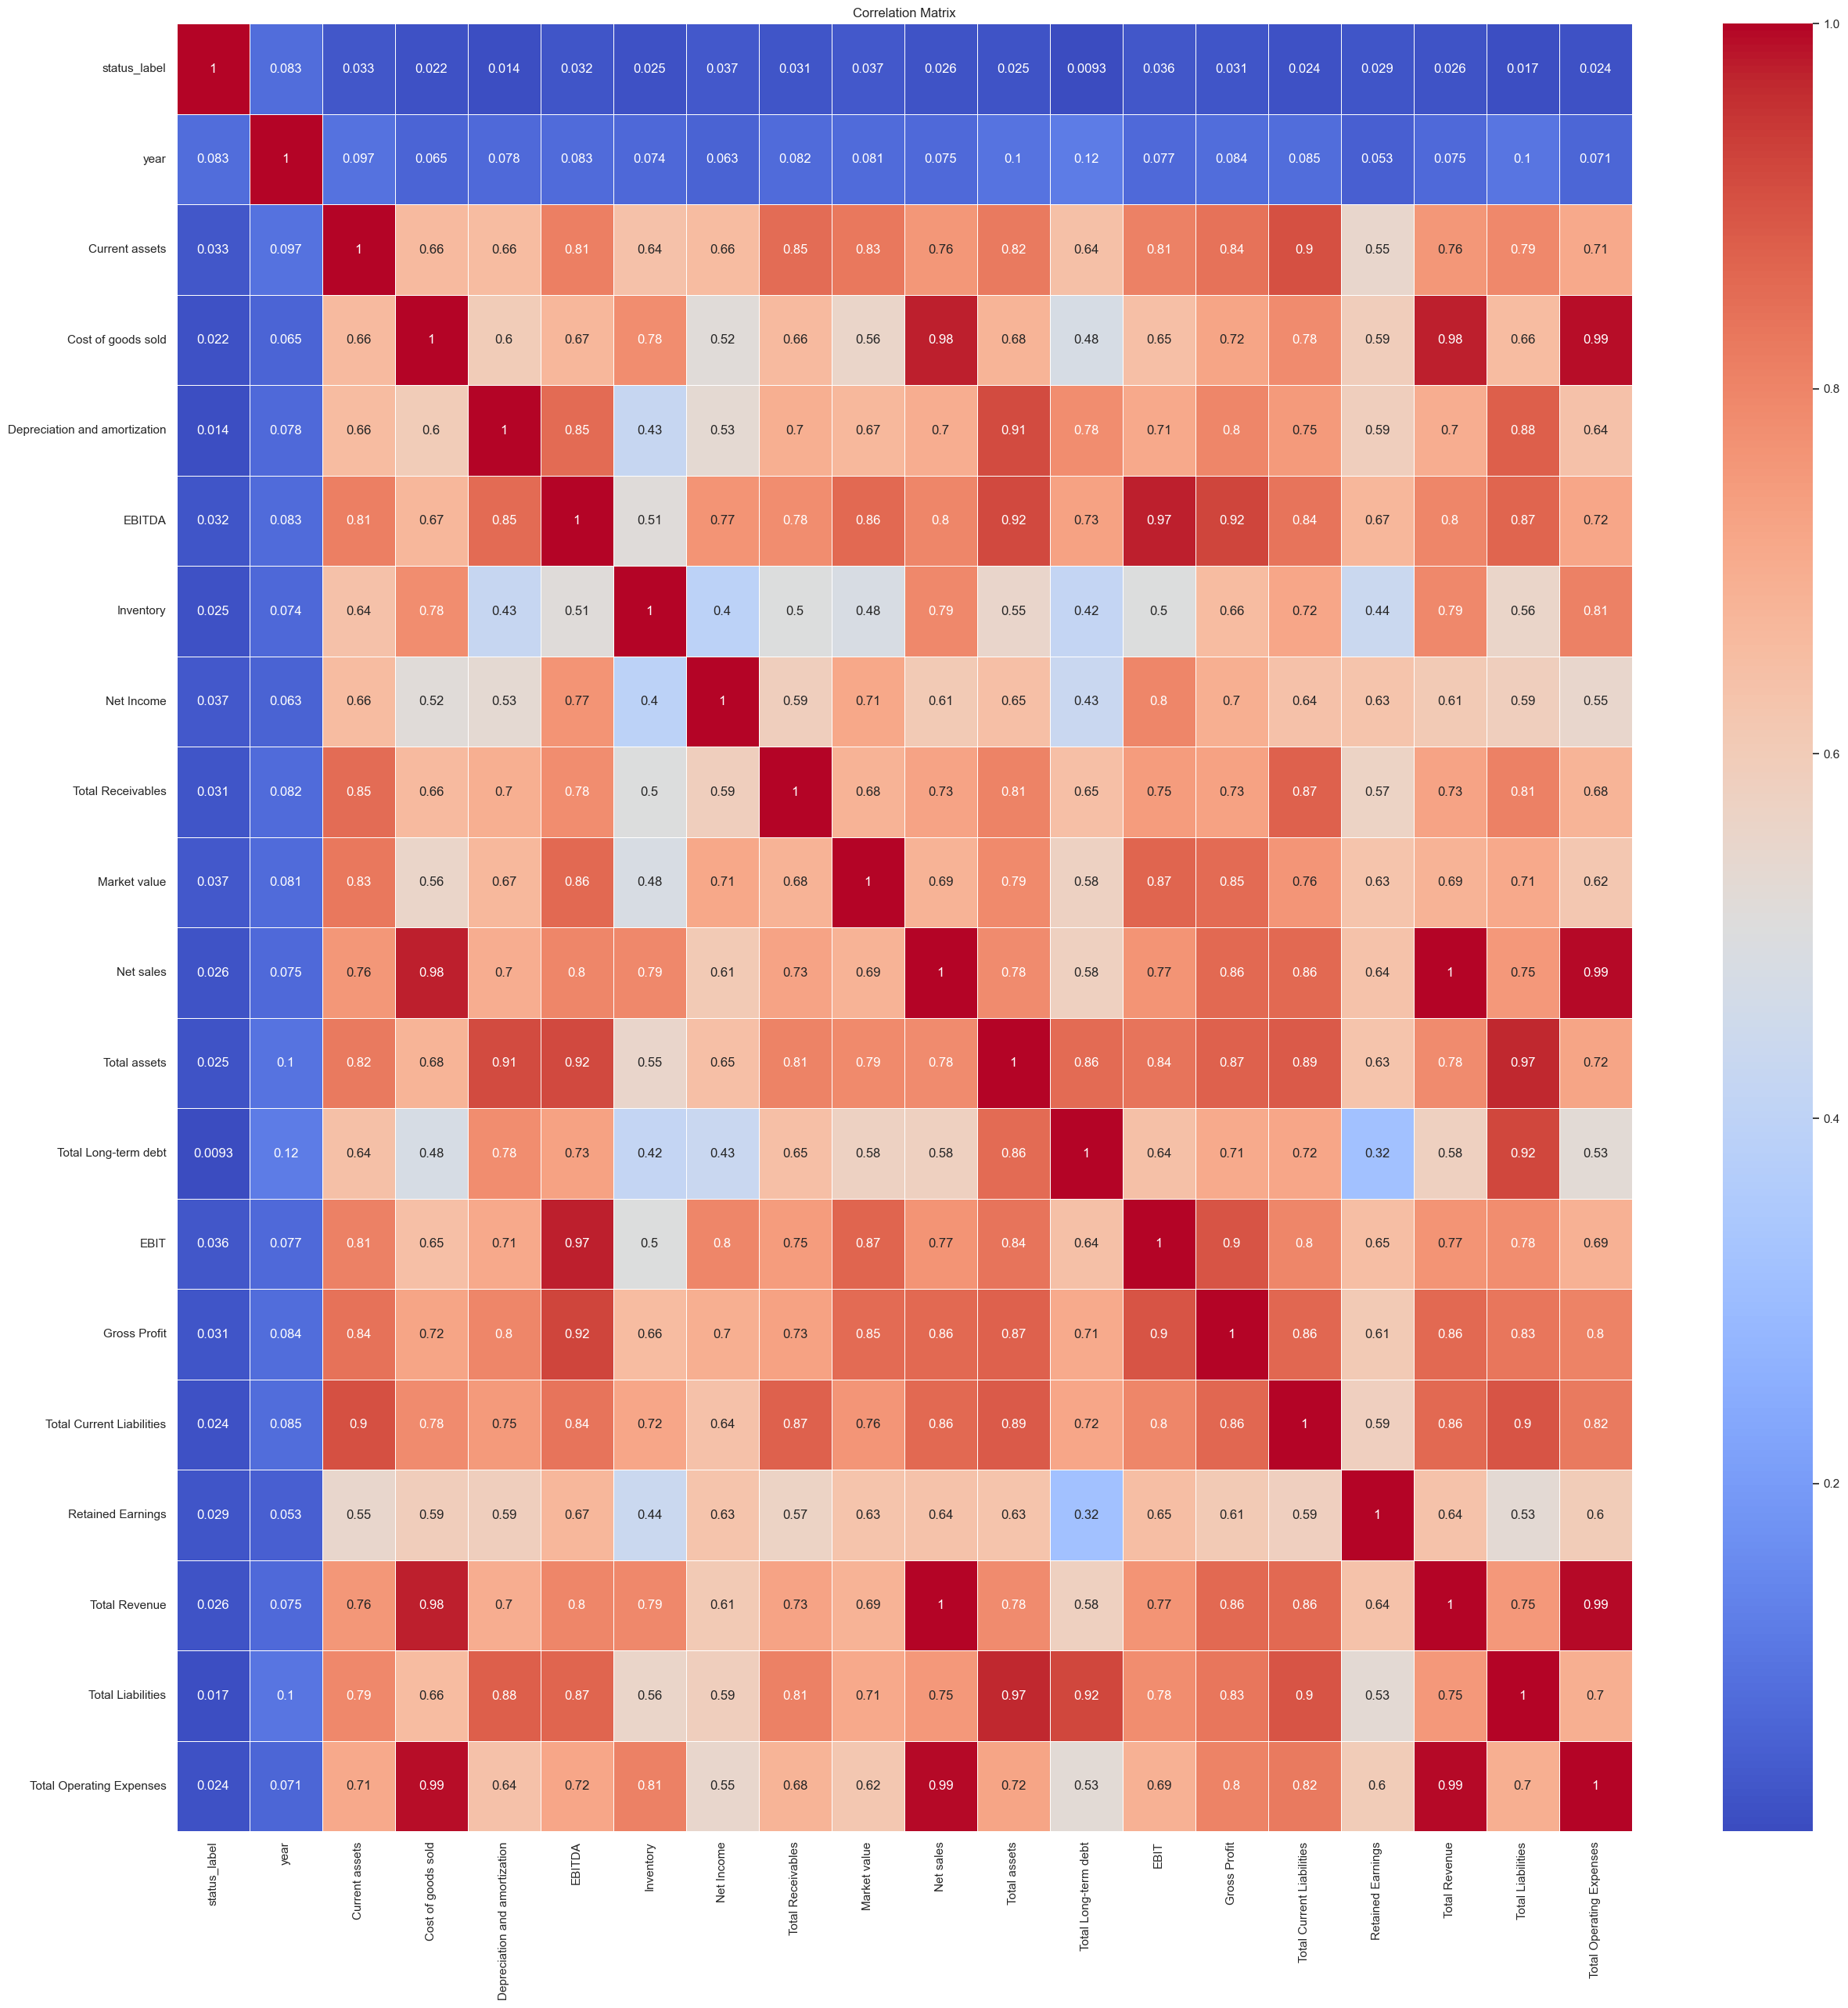

In [32]:
#vizualiztion
plt.figure(figsize=(30,30))
corr = df_numeric.corr()


sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            cmap='coolwarm',
            annot=True,
            linewidths=.5)
 
plt.title('Correlation Matrix')
# plt.xticks(rotation=90)
# plt.yticks(rotation=0) 

plt.show()

In [33]:
df_means = df_numeric.groupby('year').mean()
df_means.head()

,status_label,Current assets,Cost of goods sold,Depreciation and amortization,EBITDA,Inventory,Net Income,Total Receivables,Market value,Net sales,Total assets,Total Long-term debt,EBIT,Gross Profit,Total Current Liabilities,Retained Earnings,Total Revenue,Total Liabilities,Total Operating Expenses
year,,,,,,,,,,,,,,,,,,,
1999,0.928410,389.521593,751.810246,57.480410,163.689418,103.726278,52.602106,151.486780,2208.588239,1104.195625,1236.368270,309.034507,106.207290,352.385437,296.901016,217.758086,1104.195625,764.541200,940.507866
2000,0.922694,456.857742,878.218853,68.616871,182.000160,112.402011,40.996748,175.572706,2201.641758,1267.308758,1435.127725,332.078962,113.383063,389.091439,355.061447,219.874182,1267.308758,870.587437,1085.307290
2001,0.915458,470.675866,958.155443,82.341047,181.560525,115.227997,-9.647480,168.172925,1941.809176,1367.889119,1581.395174,388.820337,99.219477,409.733676,357.989644,188.376931,1367.889119,964.867923,1186.328594
2002,0.910987,508.040683,943.942691,72.653200,192.248198,120.379223,-32.146236,176.320315,1604.637989,1371.517937,1657.062397,414.776758,119.594998,427.575246,373.304702,102.656402,1371.517937,1060.378636,1179.269739
2003,0.906045,562.854575,1064.262520,77.369543,225.952048,131.892679,73.912968,185.286018,2157.696566,1555.783619,1844.826680,435.005613,148.582505,491.521099,387.295595,192.408731,1555.783619,1130.395285,1329.831571


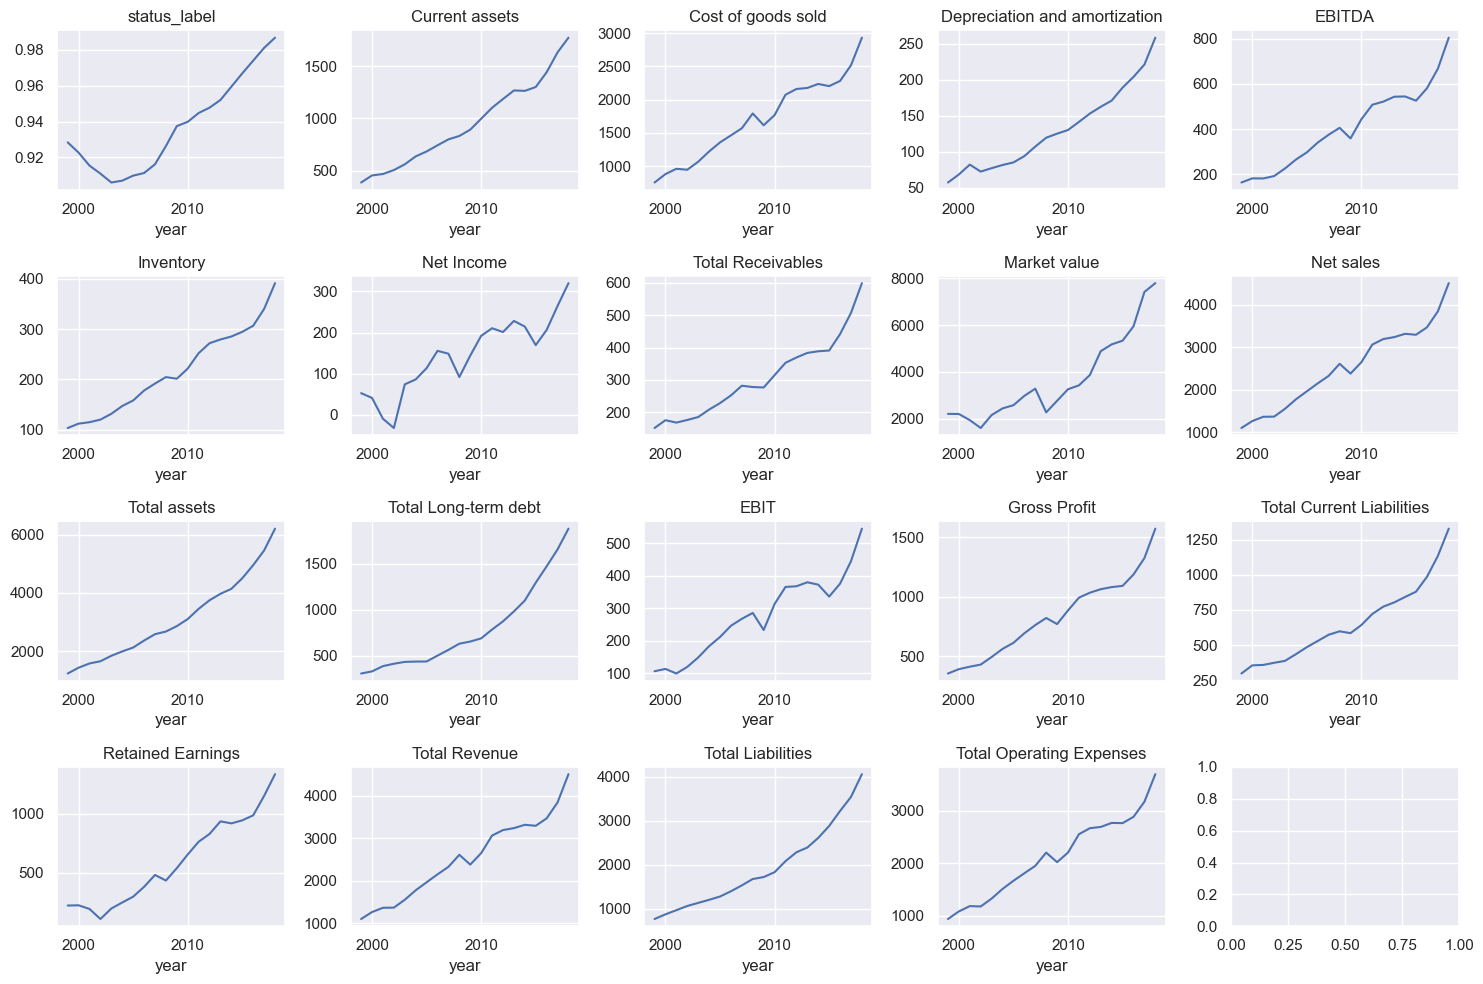

In [34]:
df_means = df_numeric.groupby('year', as_index = True).mean()
#use as_index = True to plot versus the year

#set up the number of cols and rows for plots
nFeatures = len(df_means.columns)
nRows = (nFeatures // 5) + 1  # Assuming 5 features per row (adjust as needed)
nCols = min(5, nFeatures)  # Maximum 5 columns per row

fig, axes = plt.subplots(nRows, nCols, figsize=(15, 10))

column = 0
for r in range(nRows):
    for c in range(nCols):
        if column >= nFeatures:
            break
        feature_name = df_means.columns[column]
        sns.set_theme(rc = {'figure.figsize':(7,5)})

        df_means[feature_name].plot(ax = axes[r, c])
        axes[r, c].set_title(feature_name)
        column += 1

plt.tight_layout()

# Show the plot
plt.show()

